# Data set statistics
_Script for generating visualisations of the CRM2 corpus, used as trainign material for the LSTM-model._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from collections import Counter
%matplotlib inline

rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('axes', axisbelow=True)

/Users/WHaverals/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/WHaverals/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Load the data. Print size of the corpus and the longest word.

In [2]:
words = [line.strip() for line in open('../data/crm2.txt', 'r')]
set_words = set(words)

#cnt = Counter(words)
#print(cnt.most_common)

print('Number of words:', len(words))
print('Longest word:', max(words, key=len))

Number of words: 43710
Longest word: sin-te-ly-co-laus-ghil-de-broe-ders


### Distribution of number of syllables

In [3]:
num_syls = [len(word.split('-')) for word in words]
df = pd.Series(num_syls)
print(df.describe())

count    43710.000000
mean         2.640082
std          0.963729
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
dtype: float64


<class 'pandas.core.series.Series'>


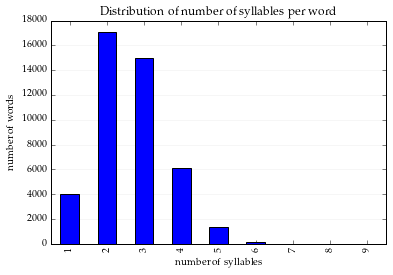

In [4]:
print(type(df))
ax = df.value_counts().sort_index().plot(kind='bar')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


ax.set_xlabel("number of syllables")
ax.set_ylabel("number of words")
ax.set_title("Distribution of number of syllables per word")
ax.grid(alpha=0.4, color='lightgrey', linestyle='solid', axis='y', zorder=0)
plt.hlines
plt.title(r"Distribution of number of syllables per word",
          fontsize=12, color='black')

fig = ax.get_figure()
fig.savefig('distribution_sylls_per_word.svg')

### Distribution of characters per syllable

In [5]:
syll_lens = []
for word in words:
    for syllable in word.split('-'):
        syll_lens.append(len(syllable))

In [6]:
df_sylls = pd.Series(syll_lens)
df_sylls.describe()

count    115398.000000
mean          3.049420
std           1.013164
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           9.000000
dtype: float64

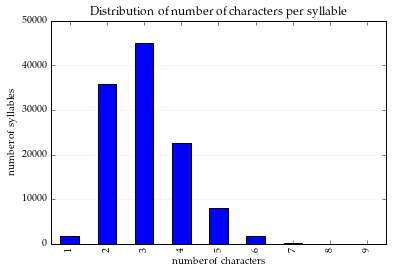

In [7]:
ax = df_sylls.value_counts().sort_index().plot(kind='bar')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax.set_xlabel("number of characters")
ax.set_ylabel("number of syllables")
ax.set_title("Distribution of numbers of characters per syllable")

ax.grid(alpha=0.4, color='lightgrey', linestyle='solid', axis='y', zorder=0)
plt.hlines

plt.title(r"Distribution of number of characters per syllable",
          fontsize=12, color='black')

fig = ax.get_figure()
fig.savefig('distribution_char_per_syl.svg')

### Distribution of characters per word

count    43710.000000
mean         8.050721
std          2.545019
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         27.000000
dtype: float64
sin-te-ly-co-laus-ghil-de-broe-ders


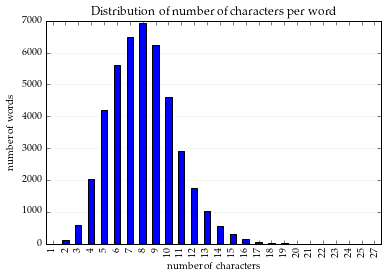

In [8]:
lenght_words = [len(word.replace('-', '')) for word in words]

df_words = pd.Series(lenght_words)
df_words.describe()
print(df_words.describe())

longest_word = ''
for word in words:
    if len(word) > len(longest_word):
        longest_word = word
print(longest_word)

ax = df_words.value_counts().sort_index().plot(kind='bar')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax.set_xlabel("number of characters")
ax.set_ylabel("number of words")
ax.set_title("Distribution of number of characters per word")

ax.grid(alpha=0.4, color='lightgrey', linestyle='solid', axis='y', zorder=0)
plt.hlines

plt.title(r"Distribution of number of characters per word",
          fontsize=12, color='black')

fig = ax.get_figure()
fig.savefig('distribution_char_per_word.svg')

-------